In [1]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygris
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from epymorph.data import geo_library, ipm_library, mm_library
from epymorph.initializer import mosquito_movement_initializer
from epymorph.simulation import Simulation

In [2]:
geo = geo_library['maricopa_cbg_2019']()

source_node = '040130927211'
mosquito = np.zeros(geo.nodes)
mosquito[np.where(geo['geoid'] == source_node)] = 50000
geo.values['bird_population'] = mosquito

In [9]:
sim = Simulation(
    geo=geo,
    ipm_builder=ipm_library['no'](),
    mvm_builder=mm_library['mosquito_mobility'](),
)

out = sim.run(
    param={
        'max_distance': 10000,
    },
    start_date=date(2023, 1, 1),
    duration_days=10,
    initializer=mosquito_movement_initializer,
)

In [10]:
df = pd.merge(
    left=pygris.block_groups(
        state="Arizona",
        county="Maricopa",
        year=2019,
    ),
    right=pd.DataFrame({
        'GEOID': geo['geoid'],
        'visitors': out.prevalence[0, :, 0],
    }),
    on='GEOID',
)

Using FIPS code '04' for input 'Arizona'
Using FIPS code '013' for input 'Maricopa'


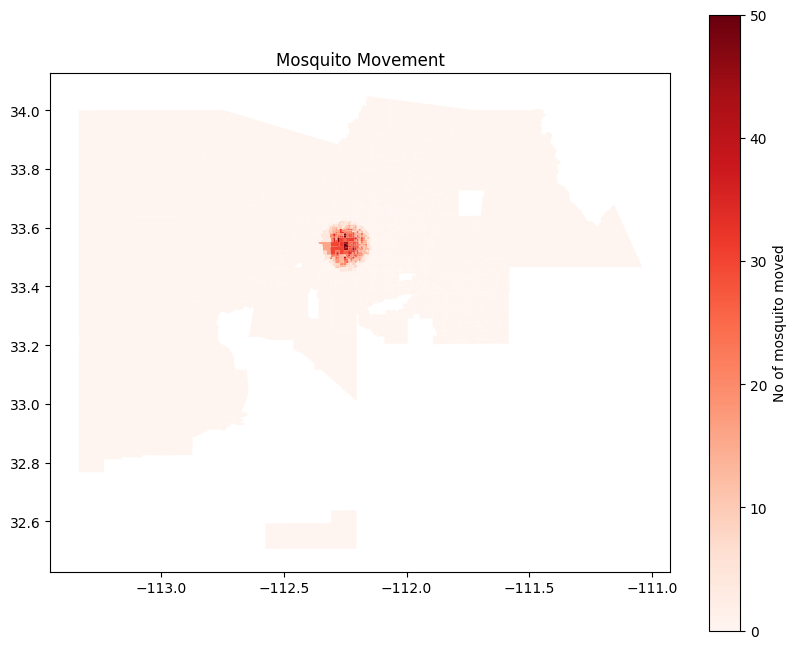

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
norm = Normalize(vmin=0, vmax=50)
sm = ScalarMappable(cmap='Reds', norm=norm)
df.plot(ax=ax, color=sm.to_rgba(df['visitors'].to_numpy()))
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('No of mosquitoes moved')
plt.title('Mosquito Movement')
plt.show()